# Getting started guide
0. Quickstart
1. Tensors
2. Datasets and DataLoaders
3. Transforms
4. Build Model
5. Automatic Differentiation
6. Optimization Loop
7. Save, Load and Use Model

## Section 0: Quickstart

In [1]:
!nvidia-smi

Thu Aug  5 18:19:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P5     9W /  N/A |    531MiB /  5934MiB |     19%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [108]:
CUDA_LAUNCH_BLOCKING=1

In [2]:
# The torch package contains data structures for multi-dimensional tensors and defines mathematical operations over these tensors. 
# Additionally, it provides many utilities for efficient serializing of Tensors and arbitrary types, and other useful utilities.
import torch
# Basic building blocks for graphs:
# Containers, Convolution Layers, Pooling layers, Padding Layers, Non-linear Activations (weighted sum, nonlinearity), Non-linear Activations (other), 
# Normalization Layers, Recurrent Layers, Transformer Layers, Linear Layers, Dropout Layers, Sparse Layers, Distance Functions, Loss Functions, Vision Layers, 
# Shuffle Layers, DataParallel Layers (multi-GPU, distributed), Utilities, Quantized Functions, Lazy Modules Initialization
from torch import nn
# torch.utils.data.Dataset stores the samples and their corresponding labels, and torch.utils.data.DataLoader wraps an iterable around the Dataset to enable easy access to the samples.
from torch.utils.data import DataLoader
from torchvision import datasets
# Transforms are common image transformations. They can be chained together using Compose. Most transformations accept both PIL images and tensor images, 
# although some transformations are PIL-only and some are tensor-only. The Conversion Transforms may be used to convert to and from PIL images.
from torchvision import transforms
from torchvision.transforms import ToTensor, Lambda, Compose
# matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
import matplotlib.pyplot as plt

In [3]:
# trainingData = datasets.FashionMNIST(root="data",train=True, download=True, transform=ToTensor())
# testData = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/opt/conda/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:137.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Creating models

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# img_path = './img_data/train/cats/img0.jpg'
# p = transforms.Compose([transforms.Scale((256,256)), transforms.ToTensor()])


# logits = model(p)
# pred_prob = self.Softmax(dim=1)(logits)
# y_pred = pred_prob.argmax(1)
# print(f"Predicted Prob: {y_pred}")

In [5]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [6]:
for name, param in model.named_parameters():
  print(f"layers: {name} | Size: {param.size()} | Values: {param[:2]} \n")

layers: linear_relu_stack.0.weight | Size: torch.Size([8, 784]) | Values: tensor([[-0.0342,  0.0078,  0.0249,  ..., -0.0155, -0.0003,  0.0117],
        [-0.0292,  0.0108,  0.0066,  ..., -0.0162,  0.0221, -0.0185]],
       device='cuda:0', grad_fn=<SliceBackward>) 

layers: linear_relu_stack.0.bias | Size: torch.Size([8]) | Values: tensor([ 0.0173, -0.0124], device='cuda:0', grad_fn=<SliceBackward>) 

layers: linear_relu_stack.2.weight | Size: torch.Size([8, 8]) | Values: tensor([[-0.1755, -0.2895, -0.2151, -0.1264,  0.0454, -0.3455,  0.0975,  0.3112],
        [-0.1144, -0.1420, -0.1105, -0.0808, -0.3201,  0.3070, -0.1679, -0.1022]],
       device='cuda:0', grad_fn=<SliceBackward>) 

layers: linear_relu_stack.2.bias | Size: torch.Size([8]) | Values: tensor([-0.1712,  0.1051], device='cuda:0', grad_fn=<SliceBackward>) 

layers: linear_relu_stack.4.weight | Size: torch.Size([10, 8]) | Values: tensor([[ 0.0614,  0.2902, -0.0105, -0.0074, -0.1624, -0.3247,  0.3467, -0.2994],
        [-0.104

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

### Read image from Custom Dataset

In [9]:
# pic_URLlist = ['https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg',
#                'https://ichef.bbci.co.uk/news/976/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg',
#                'https://images.newscientist.com/wp-content/uploads/2021/04/27105841/gettyimages-955480082_web.jpg',
#                'https://thumbs-prod.si-cdn.com/d4e3zqOM5KUq8m0m-AFVxuqa5ZM=/800x600/filters:no_upscale():focal(554x699:555x700)/https://public-media.si-cdn.com/filer/a4/04/a404c799-7118-459a-8de4-89e4a44b124f/img_1317.jpg',
#                'https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/6/2019/10/08113321/Dog-behavior-Kasper-Luijsterburg.jpg',
#                'https://ggsc.s3.amazonaws.com/images/uploads/The_Science-Backed_Benefits_of_Being_a_Dog_Owner.jpg',
#                'https://media-cldnry.s-nbcnews.com/image/upload/newscms/2021_18/3469748/210430-frankie-al-1227_0.jpg',
#                'https://i.guim.co.uk/img/media/20098ae982d6b3ba4d70ede3ef9b8f79ab1205ce/0_0_969_1005/master/969.jpg?width=445&quality=45&auto=format&fit=max&dpr=2&s=5daa50fb52570701a280ccaea66177a9']

In [10]:
# import requests
# for i, pic_url in enumerate(pic_URLlist):
#   name = 'img'+ str(i)+'.jpg'
#   with open(name, 'wb') as handle:
#     response = requests.get(pic_url, stream=True)
#     if not response.ok:
#         print(response)
#     for block in response.iter_content(1024):
#         if not block:
#             break
#         handle.write(block)

In [15]:
import os

cat_img_loc = ['./img_data/train/cats/'+f for f in os.listdir('./img_data/train/cats')]
cat_img_loc
dog_img_loc = ['./img_data/train/dogs/'+f for f in os.listdir('./img_data/train/dogs')]
dog_img_loc
# for img in img_loc:
#   p = transforms.Compose([transforms.Scale((28,28))])
#   img = Image.open(img)
#   print(f"Original Size: {img.size}, Transformed Image: {p(img).size}")
print(cat_img_loc,'\n',dog_img_loc)

['./img_data/train/cats/img0.jpg', './img_data/train/cats/img3.jpg', './img_data/train/cats/img1.jpg', './img_data/train/cats/img2.jpg'] 
 ['./img_data/train/dogs/img4.jpg', './img_data/train/dogs/img5.jpg', './img_data/train/dogs/img7.jpg', './img_data/train/dogs/img6.jpg']


In [2]:
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms

# transform = transforms.Compose([transforms.ToTensor()])
# for img_path in ['./img_data/train/cats/img0.jpg']:
#     img = cv2.imread(img_path)
#     img = transform(img)
#     img = img.numpy()*255
#     img = img.astype('uint8')
#     print(img)
#     img = np.transpose(img, (1,2,0))
#     cv2.imshow('Transformed_img', img)
#     cv2.waitKey()

In [107]:
train_data = []
for i in range(len(cat_img_loc)):
   train_data.append(cat_img_loc[i], 0)
for i in range(len(dog_img_loc)):
    train_data.append(dog_img_loc[i], 0)
print(train_data)

TypeError: append() takes exactly one argument (2 given)

In [34]:
# img_loc = ['/content/cat0.jpg','/content/cat1.jpg','/content/cat2.jpg','/content/cat3.jpg','/content/cat4.jpg']

# for img in img_loc:
transformation = transforms.Compose([
                                      transforms.Scale((256,256)),transforms.RandomPerspective(),
                                      transforms.ToTensor(), transforms.RandomCrop((256,256)),
                                      transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
])
train_set = datasets.ImageFolder('./img_data/train/', transform=transformation)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8, shuffle=True)

/opt/conda/lib/python3.8/site-packages/torchvision/transforms/transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [37]:
train_set.classes

['cats', 'dogs']

In [36]:
len(train_set.classes)

2

In [38]:
for X, y in train_loader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([8, 3, 256, 256])
Shape of y:  torch.Size([8]) torch.int64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([8, 3, 256, 256])
Labels batch shape: torch.Size([8])


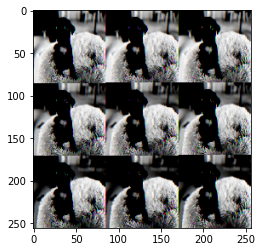

Label: 1


In [39]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze().reshape(256,256,3)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Read Image and form Fashion Dataset

In [7]:
training_data = datasets.FashionMNIST(root="data",
                                      train=True,
                                     download=False,
                                     transform=ToTensor(),)

In [8]:
test_data = datasets.FashionMNIST(root="data",
                                 train=False,
                                 download=False,
                                 transform=ToTensor(),)

In [9]:
batch_size=2
train_dataloader = DataLoader(training_data,
                             batch_size=batch_size)
test_dataloader = DataLoader(test_data,
                            batch_size=batch_size)
for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ",X.shape)
    print("Shape of y: ",y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([2, 1, 28, 28])
Shape of y:  torch.Size([2]) torch.int64


#### Training_FashionDataset

In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss:{loss:>7f} [{current:>5d}/{size:>5d}]")

In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1)== y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [12]:
epochs = 2
for t in range(epochs):
    print(f"Epochs {t+1}\n---------------------------------------------------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epochs 1
---------------------------------------------------------------------------
loss:2.320871 [    0/60000]
loss:2.312968 [  200/60000]
loss:2.291602 [  400/60000]
loss:2.258419 [  600/60000]
loss:2.309753 [  800/60000]
loss:2.199321 [ 1000/60000]
loss:2.232057 [ 1200/60000]
loss:2.222596 [ 1400/60000]
loss:2.165326 [ 1600/60000]
loss:2.284157 [ 1800/60000]
loss:2.138117 [ 2000/60000]
loss:2.026448 [ 2200/60000]
loss:2.212615 [ 2400/60000]
loss:2.211860 [ 2600/60000]
loss:1.948056 [ 2800/60000]
loss:2.136972 [ 3000/60000]
loss:1.917745 [ 3200/60000]
loss:1.994576 [ 3400/60000]
loss:2.089504 [ 3600/60000]
loss:2.299942 [ 3800/60000]
loss:1.948785 [ 4000/60000]
loss:2.054342 [ 4200/60000]
loss:2.092149 [ 4400/60000]
loss:2.336625 [ 4600/60000]
loss:1.969350 [ 4800/60000]
loss:1.802980 [ 5000/60000]
loss:1.663236 [ 5200/60000]
loss:1.931356 [ 5400/60000]
loss:2.662363 [ 5600/60000]
loss:1.225430 [ 5800/60000]
loss:1.862748 [ 6000/60000]
loss:1.079505 [ 6200/60000]
loss:1.773284 [ 640

In [14]:
torch.save(model.state_dict(),"./model/model.pth")
print("Saved Pytorch Model State to ./model")

Saved Pytorch Model State to ./model


In [15]:
load_model = NeuralNetwork()
load_model.load_state_dict(torch.load("./model/model.pth"))

<All keys matched successfully>

In [16]:
classes = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",]

load_model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = load_model(x)
    predicted, actual = classes[pred[0].argmax()], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


### Training_custom_data

In [40]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch %100 == 0:
            loss, current = loss.item(), batch* len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [42]:
CUDA_LAUNCH_BLOCKING=1

In [43]:
CUDA_LAUNCH_BLOCKING="1"
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------------------------------------------------------------")
    train(train_loader, model, loss_fn, optimizer)
print("Training Completed")

Epoch 1
---------------------------------------------------------------------------


RuntimeError: CUDA error: device-side assert triggered